In [1]:
import numpy as np 
import pandas as pd 
import hiive.mdptoolbox 
import hiive.mdptoolbox.mdp
import hiive.mdptoolbox.example
from hiive.mdptoolbox.mdp import QLearning
import mdptoolbox, mdptoolbox.example
import gym
import matplotlib.pyplot as plt

import time
from functions import *

* Must have convergency plot, i.e., reward vs iteration, delta vs iteration, define your convergence criteria (Note: mdptoolbox implementation: Qlearning - epsilon greedy is for exploration and exploitation. In VI/PI, epsilon is the convergence threshold) 

* select a small and large size for both your MDP problems

* Analysis how your problem size impact convergence, your optimal policy, your wall clock time

* Does your reward change vs wall clock time ?

* Discuss your optimal policy, a visual would be nice. Compare your optimal policy between Policy iterations and Value iterations

In [2]:
s = 500 # number of states
p = 0.1 # probability of fire
γ, ϵ = .95, 0.00001
max_iteration = 1000
P, R = hiive.mdptoolbox.example.forest(S=s, p=p)
vi = hiive.mdptoolbox.mdp.ValueIteration(P, R, γ, epsilon=ϵ, max_iter=max_iteration)
vi_iters = pd.DataFrame(vi.run())
vi_policy = vi.policy

pi = hiive.mdptoolbox.mdp.PolicyIteration(P, R, γ, max_iter=max_iteration)
pi_iters = pd.DataFrame(pi.run())
pi_policy = pi.policy

In [3]:
# P : [a][s][s'] -> [s][a][s'] -> s': [prob, s', R, done]
a_0 = P[0]
a_1 = P[1]
T = {}
for s, state in enumerate(a_0):
    cur_state = {0: [], 1:[]}
    for s_, next_state in enumerate(state):
        cur_state[0].append([a_0[s][s_], s_, R[s][0], False])
        cur_state[1].append([a_1[s][s_], s_, R[s][1], False])
    T[s] = cur_state

In [4]:
nA = 2
nS = 500

Value iteration converged
policy converged at iteration 31
Wall time: 16min 32s


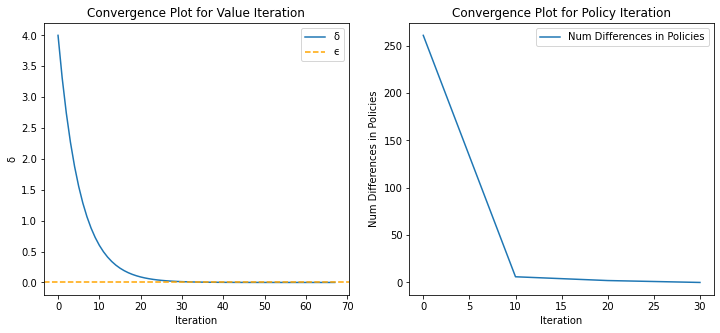

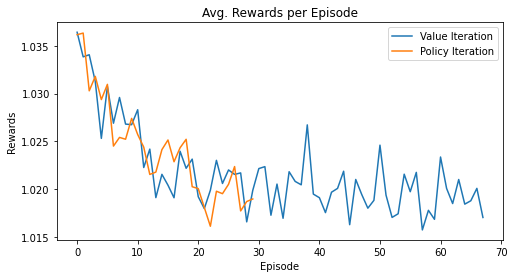

In [5]:
%%time
fig1, ax_conv = plt.subplots(1, 2, figsize=(12,5))
fig2, ax_succ = plt.subplots(figsize=(8,4))
γ, ϵ = .9, 0.00001
V, π, action, vi_runtime = value_iteration(T, γ, ϵ, ax_conv[0], ax_succ, nS, nA, R=R)

opt_V2, opt_policy2, pi_runtime = policy_iteration(T, ϵ, ax_conv[1], ax_succ, nS, nA, discount_factor = γ, max_iteration = 1000, R=R)

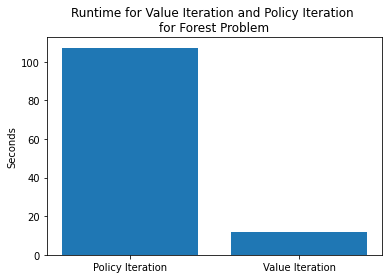

In [6]:
def plot_runtime(runtimes, labels, title):
    plt.bar(labels, runtimes)
    plt.title(title)
    plt.ylabel('Seconds')
    
plot_runtime([vi_runtime, pi_runtime], 
             ['Policy Iteration', 'Value Iteration'], 
             'Runtime for Value Iteration and Policy Iteration \nfor Forest Problem')

In [7]:
vi_π = [list(val).index(1) for val in π]
pi_π = list(opt_policy2)
print('VI policy:', vi_π)
print('PI policy:', pi_π)

VI policy: [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [8]:
from IPython.display import clear_output

test_count = 50
q_df = train_q_learning_forest(P, R, 50, discount=0.9, alpha_dec=[.7,.8,.9,0.99], alpha_min=[0.01], 
            epsilon=[.2,.4,.6,.8, 1.0], epsilon_decay=[.7,0.8,0.9,0.99], n_iter=[10000])

def plot_q(q_df, param, param2, metric):
    copy = q_df.copy()# .groupby(param).mean()
    for val in copy[param2].unique():
        cur = copy[copy[param2] == val]
        grouped = cur.groupby(param).mean()
        plt.plot(grouped.index, grouped[metric])
        plt.scatter(cur[param], cur[metric], label=f'{param2}:{val}', alpha=0.6)
    plt.legend()
    plt.xlabel(param)
    plt.ylabel(metric)
    plt.title(f'{param}, {param2} vs {metric}')
    
plot_q(q_df, 'Epsilon', 'Epsilon Decay', 'Reward')

1: 0.3085909147489617
2: 0.30642475611889014
3: 0.323021470412998
4: 0.3121343533660835
5: 0.3183870148541639
6: 0.2987431344264021
7: 0.30297449810171617
8: 0.3138925831972645
9: 0.3204680796068318
10: 0.32158296975004164
11: 0.33531161358900086
12: 0.29
13: 0.3195248161861887
14: 0.30222110320597123
15: 0.31557319278198304
16: 0.3119814206989045
17: 0.3502306374991625
18: 0.3197349751221354
19: 0.3373003887782187
20: 0.3299406518535721
21: 0.3416753617645705
22: 0.3019978955211265
23: 0.32646905951483945
24: 0.3015744149825355
25: 0.34666177134389714
26: 0.3050582275748456
27: 0.33781163104680223
28: 0.32738657808922367
29: 0.3170577267370854
30: 0.3260223374249579
31: 0.3406693384191727
32: 0.30393977828684576
33: 0.3251145767967007
34: 0.32036355770016317
35: 0.3097282674484905
36: 0.29644723003256435
37: 0.3207704215106079
38: 0.307708718864175
39: 0.32496451018417777
40: 0.3056930201509512
41: 0.31874332662017135
42: 0.3242529917132556
43: 0.3169685508165213
44: 0.310586310234151

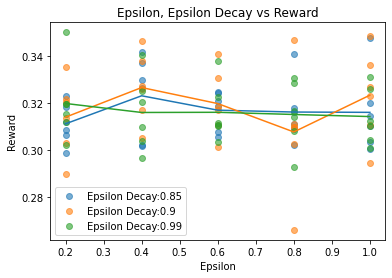

In [10]:
def plot_q(q_df, param, param2, metric):
    copy = q_df.copy()# .groupby(param).mean()
    for val in copy[param2].unique():
        cur = copy[copy[param2] == val]
        grouped = cur.groupby(param).mean()
        plt.plot(grouped.index, grouped[metric])
        plt.scatter(cur[param], cur[metric], label=f'{param2}:{val}', alpha=0.6)
    plt.legend()
    plt.xlabel(param)
    plt.ylabel(metric)
    plt.title(f'{param}, {param2} vs {metric}')
    
plot_q(q_df, 'Epsilon', 'Epsilon Decay', 'Reward')